# Goal: Running a Basic Explorative Asset Return Analysis

## Hey, Python techies!!

The first step when working with a financial data set is often to calculate some basic return statistics. For that, we plot the time series of asset returns, calculate its annualized mean and volatility and compute its Sharpe ratio. This way, we get a feeling for the data and are able to immediately identify strange-looking numbers, which would likely point to errors in the data set.

## Let's see how all of that works.

For the analysis, we will need the pandas, the numpy and the matplotlib modules, which we import first.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here, we will look at returns of the S&P 500 index. To that end, we first need to import price data for the S&P 500 from a csv data file. After doing that in code line 4, we print the head of the data set in code line 5 to see how the data set is structured. We have two columns: A 'Date' column and a 'price' column with the S&P 500's closing price for the respective date. 

In [11]:
sp500 = pd.read_csv('sp500.csv', parse_dates = ['Date'])
sp500.head()

,Date,price
0,1999-12-31,1469.25
1,2000-01-03,1455.22
2,2000-01-04,1399.42
3,2000-01-05,1402.11
4,2000-01-06,1403.45


The first step is to compute log returns. Remember the formula for log returns:

$$r_t = \log \left( \frac{S_t}{S_{t-1}} \right) = \log S_t - \log S_{t-1}.$$

We use the numpy function 'log' to compute the natural logarithm of the observed prices. Also, we use pandas' 'shift' function to shift all prices forward by one period. That way, we can easily handle the one-period time lag between $S_t$ and $S_{t-1}$.

In [12]:
sp500['logret'] = np.log(sp500['price']) - np.log(sp500['price'].shift())

Having thus calculated daily log returns, we now plot their time series. Code lines 7 to 10 create that easy plot for us. As you can see, returns look very noisy over time: Days with positive and negative returns quickly follow each other. Also, their magnitude appears to be changing over time. Return look noisier during the financial crisis 2008-2009 than during the calm period between 2004-2006. Overall, the magnitudes appear realistic, with the largest one-day return around +10% and the smallest one-day return around -10%. This visual test is an important step in identifying data errors: If something does totally not fit to you intuition, it might be a flaw in the data.

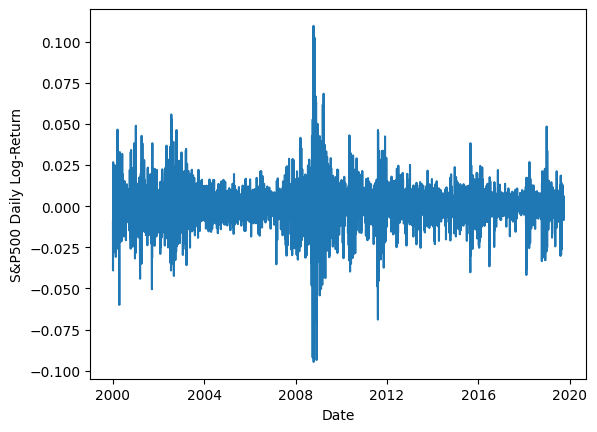

In [13]:
plt.plot(sp500['Date'], sp500['logret'])
plt.xlabel("Date")
plt.ylabel("S&P500 Daily Log-Return")
plt.show()

We continue by computing the daily mean of log returns over time in code line 11. For that, we use the 'np.mean(...)' function. Afterward, we print the result. The average daily S&P 500 return is fairly low, in the order of 0.01% per day.

In [14]:
daily_return_mean = np.mean(sp500['logret'])
print("Daily Mean of Log-Returns: ", daily_return_mean)

Daily Mean of Log-Returns:  0.0001361246114135408


Next, we calculate the standard deviation of daily returns with the use of the 'np.std(...)' function in code line 13. Again we print the result afterwards. Compared to their average mean, returns have a high standard deviation of around 1.2% per day.

In [15]:
daily_return_std = np.std(sp500['logret'])
print("Daily Standard Deviation of Log-Returns: ", daily_return_std)

Daily Standard Deviation of Log-Returns:  0.011738696773211092


It is often easier for comparing the return characteristics of different assets to work with yearly numbers. To that end, we *annualize* our daily return statistics. Annualization just assumes that the same statistic (i.e. mean and standard deviation) applies to each return in a year. That way, we can easily calculate the yearly mean return as 252 time the daily mean return. Why 252? Well, there are on average 252 trading days in a year. Code line 15 does that. We can now easily see that the S&P 500 earned an average yearly return of 3.4% during our time frame. That number is much more intuitive and easier to handle than the daily figure.

In [16]:
annual_return_mean = daily_return_mean * 252
print("Annualized Mean of Log-Returns: ", annual_return_mean)

Annualized Mean of Log-Returns:  0.03430340207621228


We do the same for standard deviation. Remember that standard deviation scales with the root of the time period, though. This means, for annualizing our daily standard deviation figure, we need to multiply it with $\sqrt{252}$. We do that in code line 17. By using the root, the difference between the daily and the yearly figure is not as large as for the mean. Still, we see that the S&P 500 had an average yearly standard deviation of 18.6% during our sample period.

In [17]:
annual_return_std = daily_return_std * (252**0.5)
print("Annualized Standard Deviation of Log-Returns: ", annual_return_std)

Annualized Standard Deviation of Log-Returns:  0.18634603426747756


Finally, let's calculate a Sharpe ratio as a measure for the profitability of some investment. The Sharpe ratio is defined as the ratio of the premium above the riskfree rate, that an asset earns, and its volatility:

$$SR = \frac{r - r_f}{\sigma_r}$$

We will just use a riskfree rate of 1% here, which we define in code line 19. We follow the formula above in code line 20 and arrive at a Sharpe ratio of 0.13. This is lower than the long-term average for the S&P 500, which is around 0.4.

In [18]:
riskfree_rate = 0.01
Sharpe_ratio = (annual_return_mean - riskfree_rate) / annual_return_std
print("Yearly Sharpe Ratio for the S&P 500: ", Sharpe_ratio)

Yearly Sharpe Ratio for the S&P 500:  0.13042081722720023


MU: potential exercise
1. redo the calculation with simple returns and see whether any of the results are different

2. take the daily data and create a monthly time series of it. then, re-do the exercise, separately, for log and simple returns and see whether results differ.